In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D
from keras.layers import MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:

print(tf.__version__)

2.1.0


In [2]:
train_path="C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/train/"
test_path="C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/test/"
val_path="C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/val/"

In [3]:
x_train=[]
for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)
        
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):
    
    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [4]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [5]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,rescale = 1./255)
test_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,rescale = 1./255)
val_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 shuffle = True,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            shuffle = False,
                                            class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            shuffle = False,
                                            class_mode = 'categorical')

Found 2000 images belonging to 2 classes.
Found 251 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


In [6]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [7]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((2000,), (251,), (250,))

In [3]:
IMAGE_SIZE = [224, 224]

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False


In [4]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

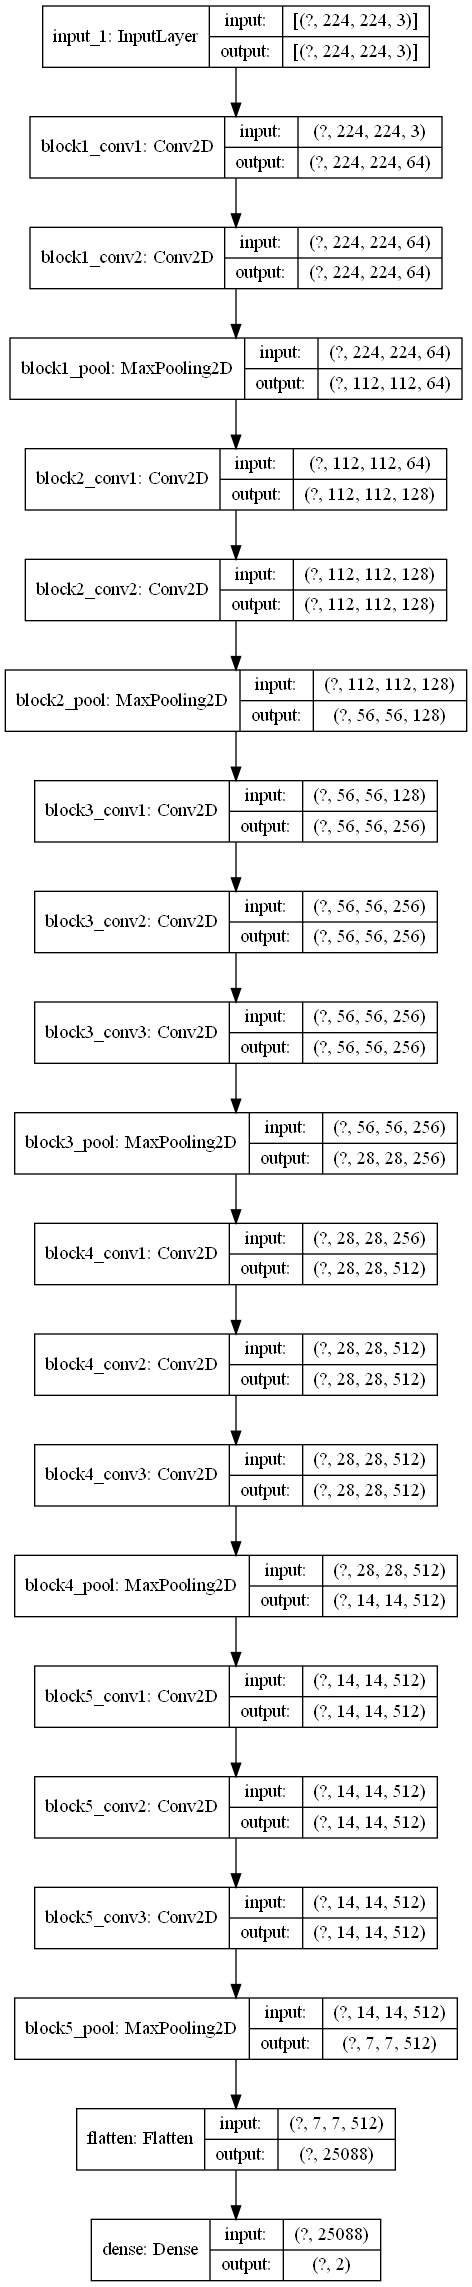

In [5]:
from tensorflow.keras.utils import plot_model
import graphviz
import pydot
import pydotplus
plot_model(model, to_file='vgg16model.png', show_shapes=True)

In [4]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer=opt,
  metrics=["accuracy"]
)

In [5]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [18]:
model.save("C:/Users/atulp/OptimizersBrainStroke/AdamSavedModel/modelAdamAugmented.h5")

In [12]:
import tensorflow as tf
with tf.device("cpu:0"):
    history = model.fit(
        train_x,
        train_y,
        validation_data=(val_x,val_y),
        epochs=10,
        callbacks=[early_stop],
        batch_size=32,shuffle=True)

Epoch 1/10
63/63 [==============================] - 165s 3s/step - loss: 0.6242 - accuracy: 0.6975 - val_loss: 0.5269 - val_accuracy: 0.7080
Epoch 2/10
63/63 [==============================] - 162s 3s/step - loss: 0.3735 - accuracy: 0.8250 - val_loss: 0.3520 - val_accuracy: 0.8520
Epoch 3/10
63/63 [==============================] - 162s 3s/step - loss: 0.2437 - accuracy: 0.9095 - val_loss: 0.2786 - val_accuracy: 0.9000
Epoch 4/10
63/63 [==============================] - 162s 3s/step - loss: 0.1664 - accuracy: 0.9560 - val_loss: 0.2654 - val_accuracy: 0.8960
Epoch 5/10
63/63 [==============================] - 160s 3s/step - loss: 0.1433 - accuracy: 0.9690 - val_loss: 0.2663 - val_accuracy: 0.9000
Epoch 6/10
63/63 [==============================] - 163s 3s/step - loss: 0.1232 - accuracy: 0.9755 - val_loss: 0.2473 - val_accuracy: 0.8960
Epoch 7/10
63/63 [==============================] - 159s 3s/step - loss: 0.0932 - accuracy: 0.9890 - val_loss: 0.2108 - val_accuracy: 0.9240
Epoch 8/10
63

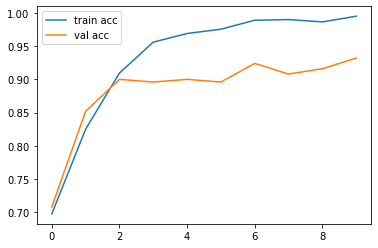

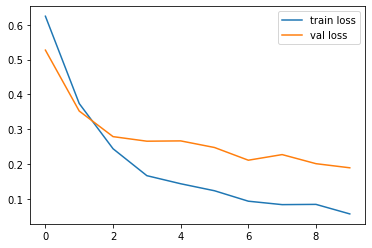

In [14]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()


plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

plt.show()

In [15]:
history.history

{'loss': [0.6242063641548157,
  0.3735288679599762,
  0.24374228715896606,
  0.16643516719341278,
  0.14325886964797974,
  0.12315770238637924,
  0.09317154437303543,
  0.08330706506967545,
  0.08402740210294724,
  0.056646447628736496],
 'accuracy': [0.6974999904632568,
  0.824999988079071,
  0.909500002861023,
  0.9559999704360962,
  0.968999981880188,
  0.9754999876022339,
  0.9890000224113464,
  0.9900000095367432,
  0.9865000247955322,
  0.9950000047683716],
 'val_loss': [0.5268939137458801,
  0.35200235247612,
  0.2785586416721344,
  0.26543474197387695,
  0.26631078124046326,
  0.24732744693756104,
  0.21083858609199524,
  0.22698065638542175,
  0.20089709758758545,
  0.18906205892562866],
 'val_accuracy': [0.7080000042915344,
  0.8519999980926514,
  0.8999999761581421,
  0.8960000276565552,
  0.8999999761581421,
  0.8960000276565552,
  0.9240000247955322,
  0.9079999923706055,
  0.9160000085830688,
  0.9319999814033508]}

In [16]:
model.evaluate(test_x,test_y,batch_size=32)

8/8 [==============================] - 18s 2s/step - loss: 0.1595 - accuracy: 0.9363


[0.1595463752746582, 0.9362549781799316]

In [17]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

#get classification report
#print(classification_report(y_pred,test_y))

#get confusion matrix

#print(confusion_matrix(y_pred,test_y))

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracy_score(y_pred,test_y)

0.9362549800796812

In [19]:
recall_score(y_pred,test_y)

0.9647058823529412

In [20]:
precision_score(y_pred,test_y)

0.8631578947368421

In [21]:
f1_score(y_pred,test_y)

0.9111111111111111

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

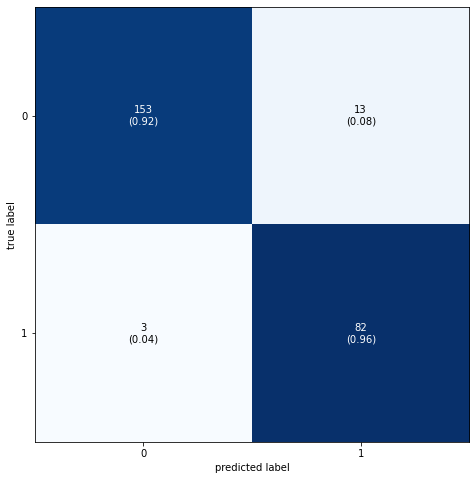

In [22]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_pred,test_y)
plot_confusion_matrix(conf_mat=mat, figsize=(8,8),show_normed=True)

Stroke


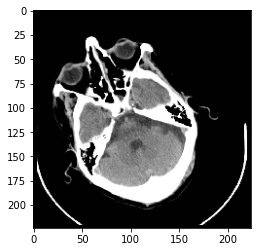

In [23]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
img = image.load_img("C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/test/Stroke/92 (12).jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("C:/Users/atulp/OptimizersBrainStroke/AdamSavedModel/modelAdamAugmented.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Stroke")
else:
    print('Normal')